### Data Set Information:
- "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." 

__Attribute Information:__

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

### Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error

### Reading Data

In [2]:
path = "data.csv"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(path, delim_whitespace=True, names=column_names)

print df.shape
df.head(5)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
#dealing with missing values
df = df[df['horsepower']!='?']
df['horsepower'] = df['horsepower'].astype('float64')

### Corrleation Matrix

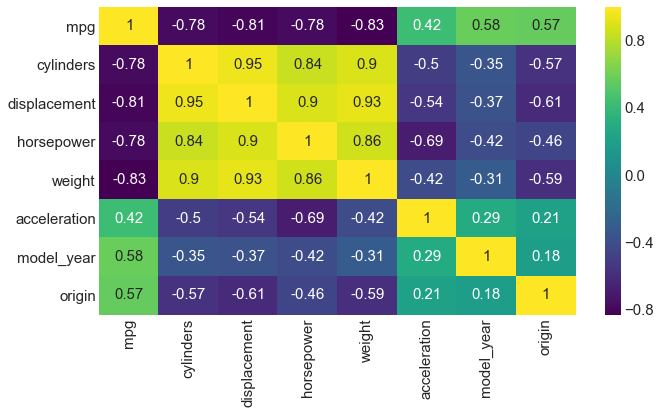

In [5]:
plt.rc('font',size=15)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.tight_layout();

In [6]:
df.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [7]:
df.model_year.value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model_year, dtype: int64

In [8]:
df.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

### Scaling

In [9]:
scalar = MinMaxScaler()
df[['weight','displacement','horsepower']] = scalar.fit_transform(df[['weight','displacement','horsepower']])

In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,0.617571,0.456522,0.536150,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,0.728682,0.646739,0.589736,11.5,70,1,buick skylark 320
2,18.0,8,0.645995,0.565217,0.516870,11.0,70,1,plymouth satellite
3,16.0,8,0.609819,0.565217,0.516019,12.0,70,1,amc rebel sst
4,17.0,8,0.604651,0.510870,0.520556,10.5,70,1,ford torino


### Train-Test Split

In [11]:
X = df.drop(['mpg','car_name'],axis=1)
y = df.mpg

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.2,random_state=3)

### Basic Model

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

### Evaluation

In [13]:
mean_squared_error(y_pred=y_pred,y_true=y_test)

13.042715475330086

In [14]:
from sklearn.metrics import r2_score
r2_score(y_pred=y_pred,y_true=y_test)

0.7860678271410473

### Ridge/ L2 regularization

In [15]:
#using ridge#using r 
rid = Ridge(alpha=.05)
rid.fit(X_train,y_train)
y_pred = rid.predict(X_test)
print mean_squared_error(y_true=y_test, y_pred=y_pred)
r2_score(y_pred=y_pred,y_true=y_test)

13.022174377160654


0.7864047509796918

### Feature Selection

In [16]:
from xgboost import XGBRegressor

In [17]:
X = df.drop(['mpg','car_name'],axis=1)
y = df.mpg
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=42)

xgreg = XGBRegressor()
xgreg.fit(X_train1, y_train1)
y_pred_val = xgreg.predict(X_val)
print ('MSE on validation set(xgb): {}'.format(mean_squared_error(y_true=y_val, y_pred=y_pred_val)))
print ('R-Square on validation set(xgb): {}'.format(r2_score(y_pred=y_pred_val,y_true=y_val)))


xgreg.fit(X_train,y_train)
y_pred_test = xgreg.predict(X_test)
print ('MSE on test set(xgb): {}'.format(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
print ('R-Square on test set(xgb): {}'.format(r2_score(y_pred=y_pred_test,y_true=y_test)))

MSE on validation set(xgb): 11.7504465977
R-Square on validation set(xgb): 0.727043009144
MSE on test set(xgb): 6.39722426877
R-Square on test set(xgb): 0.874663966148


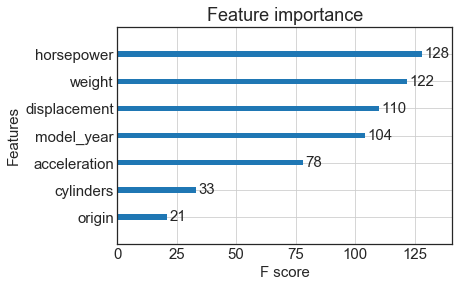

In [18]:
from xgboost import plot_importance
plot_importance(xgreg);

In [19]:
X = df[['displacement','horsepower','acceleration','model_year','weight']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=42)

xgb = XGBRegressor()
xgb.fit(X_train1, y_train1)
y_pred_val = xgb.predict(X_val)
print ('MSE on validation set(xgb): {}'.format(mean_squared_error(y_true=y_val, y_pred=y_pred_val)))
print ('R-Square on validation set(xgb): {}'.format(r2_score(y_pred=y_pred_val,y_true=y_val)))


xgb.fit(X_train,y_train)
y_pred_test = xgb.predict(X_test)
print ('MSE on test set(xgb): {}'.format(mean_squared_error(y_true=y_test, y_pred=y_pred_test)))
print ('R-Square on test set(xgb): {}'.format(r2_score(y_pred=y_pred_test,y_true=y_test)))

MSE on validation set(xgb): 10.7450937773
R-Square on validation set(xgb): 0.750396851768
MSE on test set(xgb): 6.16787955268
R-Square on test set(xgb): 0.87915734576
